In [28]:
import pandas as pd
import numpy as np

In [29]:
#loading the first dataset in 

url = 'https://github.com/tmartabano/Project-for-Data-Munging/raw/main/2000-2019.csv'
df1 = pd.read_csv(url)
df1.head()
#standardizing some of the measures 
df1['tempo'] = df1['tempo'].round(0)
df1['main_genre'] = df1['genre'].str.split(',').str[0]
df1['year'] = df1['year'].astype(float)

df1.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,main_genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000.0,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.0,pop,pop
1,blink-182,All The Small Things,167066,False,1999.0,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,149.0,"rock, pop",rock
2,Faith Hill,Breathe,250546,False,1999.0,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,137.0,"pop, country",pop
3,Bon Jovi,It's My Life,224493,False,2000.0,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,120.0,"rock, metal",rock
4,*NSYNC,Bye Bye Bye,200560,False,2000.0,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,173.0,pop,pop


In [30]:
#loading in second dataset
url = 'https://raw.githubusercontent.com/tmartabano/Project-for-Data-Munging/main/top_10000_1960-now.csv'
df2 = pd.read_csv(url)

#standardizing some measures 
df2['Tempo'] = df2['Tempo'].round(0)
df2['year'] = df2['Album Release Date'].str[-2:].astype(float)

#separating the dates from < 2000 and after > 2000
df2.loc[df2['year'] < 50, 'year'] += 2000
df2.loc[df2['year'] < 100, 'year'] += 1900
df2['year']

0       1992.0
1       2009.0
2       1999.0
3       2014.0
4       1969.0
         ...  
9994    2022.0
9995    2005.0
9996    2000.0
9997    2023.0
9998    2023.0
Name: year, Length: 9999, dtype: float64

In [33]:
#sett of conditions to get the genre into usable data
conditions = [
    df2['Artist Genres'].str.contains('pop', case=False, na=False),
    df2['Artist Genres'].str.contains('rock', case=False, na=False),
    df2['Artist Genres'].str.contains('hip hop', case=False, na=False),
    df2['Artist Genres'].str.contains('country', case=False, na=False),
     df2['Artist Genres'].str.contains('soul', case=False, na=False)
]

#possible genres if not its other 
categories = ['pop', 'rock', 'hip hop', 'country','soul']

# Apply the conditions and assign categories
df2['Genre Category'] = np.select(conditions, categories, default='Other')
df2.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights,year,Genre Category
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,8/3/92,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.112000,0.4080,0.504,111.0,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",1992.0,Other
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,10/23/09,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.000021,0.2370,0.800,127.0,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",2009.0,pop
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1/12/99,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.000001,0.3380,0.706,75.0,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC,1999.0,pop
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,10/20/14,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.000051,0.0384,0.833,75.0,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",2014.0,rock
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,12/5/69,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.000073,0.2890,0.497,86.0,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",1969.0,rock


In [6]:
#loading in the third and final dataset 

url = 'https://raw.githubusercontent.com/tmartabano/Project-for-Data-Munging/main/30ksongs.csv'
df3 = pd.read_csv(url)

# standardizing the year into a usable format
df3['year'] = pd.to_datetime(df3['track_album_release_date'], errors='coerce').dt.year
df3['year'] = df3['year'].astype(float)
df3.head()



,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019.0


In [34]:
#test code block
df4 = df3[['track_name', 'track_artist', 'playlist_genre']]
df4['track_name'].groupby(df4['playlist_genre']).count()

playlist_genre
edm      6043
latin    5153
pop      5507
r&b      5431
rap      5743
rock     4951
Name: track_name, dtype: int64

In [11]:
#formatting the data we want into new dataframes with uniform column names 

# For df1
df4 = df1[['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']]
df4.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']
# For df2
df5 = df2[['Track Name', 'Artist Name(s)', 'year', 'Track Duration (ms)', 'Key', 'Loudness', 'Mode', 'Tempo', 'Genre Category']]
df5.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']
# For df3
df6 = df3[['track_name', 'track_artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'playlist_genre']]
df6.columns = ['song', 'artist', 'year', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'main_genre']

In [14]:
#compilling the 3 dataset subsets into one dataframe
big_df = pd.concat([df4, df5, df6], ignore_index = True)

In [15]:
#get rid of duplicates be careful with this one and get it checked 
big_df['song'] = big_df['song'].drop_duplicates()

In [16]:
#rounding tempo has it is measured by nearest whole number 
big_df['tempo'] = big_df['tempo'].round(0)
big_df['minutes'] = big_df['duration_ms'] / 60000

In [17]:
genre_counts = big_df['main_genre'].value_counts()

# Replace genres with count <= 10 with 'Other'
big_df['main_genre'] = big_df['main_genre'].apply(lambda x: 'Other' if genre_counts[x] <= 10 else x)
big_df['main_genre'] = big_df['main_genre'].replace('r&b', 'R&B')

In [18]:
#creating a new column to have genre as a numerical data type 
# order of mapping goes from most popular to least popular in the dataset 
genre_mapping = {
    'pop': 1,
    'rock': 2,
    'edm': 3,
    'rap': 4,
    'R&B': 5,
    'latin': 6,
    'Other': 7,
    'hip hop': 8,
    'soul': 9,
    'country': 10,
    'Dance/Electronic': 11,
    'set()': 12
}

big_df['genre_id'] = big_df['main_genre'].map(genre_mapping).fillna(7)
big_df.head()


,song,artist,year,duration_ms,key,loudness,mode,tempo,main_genre,minutes,genre_id
0,Oops!...I Did It Again,Britney Spears,2000.0,211160,1.0,-5.444,0.0,95.0,pop,3.519333,1
1,All The Small Things,blink-182,1999.0,167066,0.0,-4.918,1.0,149.0,rock,2.784433,2
2,Breathe,Faith Hill,1999.0,250546,7.0,-9.007,1.0,137.0,pop,4.175767,1
3,It's My Life,Bon Jovi,2000.0,224493,0.0,-4.063,0.0,120.0,rock,3.741550,2
4,Bye Bye Bye,*NSYNC,2000.0,200560,8.0,-4.806,0.0,173.0,pop,3.342667,1


In [19]:
#calculating the number of songs by genre
Total_song_genre = big_df.groupby('main_genre')['song'].count().sort_values(ascending = False)
Total_song_genre

main_genre
pop                 7686
rock                4710
rap                 4547
edm                 3676
latin               3256
R&B                 3086
Other               1331
hip hop              841
soul                 211
country               53
Dance/Electronic      37
set()                 22
Name: song, dtype: int64

In [20]:
#On avgeage what genre has the longest songs 
avg_duration = big_df.groupby('main_genre')['duration_ms'].mean().sort_values(ascending = False)
avg_min = avg_duration / 60000
avg_min

main_genre
rock                4.053702
Dance/Electronic    4.018207
R&B                 3.959603
hip hop             3.913340
edm                 3.709014
pop                 3.682748
Other               3.625255
latin               3.614849
soul                3.597835
rap                 3.569398
set()               3.567757
country             3.408282
Name: duration_ms, dtype: float64

In [21]:
#On avgeage what genre has the fastest tempo 
avg_tempo = big_df.groupby('main_genre')['tempo'].mean().sort_values(ascending = False)
avg_tempo

main_genre
country             132.779412
edm                 125.766507
Dance/Electronic    125.536585
rock                124.399413
Other               121.717722
pop                 120.875677
rap                 120.650714
set()               120.181818
latin               118.633656
hip hop             117.616580
soul                116.496063
R&B                 114.211425
Name: tempo, dtype: float64

In [22]:
#years with the most songs in the dataset 
Total_song_year = big_df.groupby('year')['song'].count().sort_values(ascending = False)
Total_song_year

year
2019.0    6165
2018.0    2508
2017.0    1910
2016.0    1607
2015.0    1498
          ... 
2064.0       1
2061.0       1
2057.0       1
1956.0       1
2058.0       0
Name: song, Length: 81, dtype: int64

<Axes: xlabel='loudness', ylabel='tempo'>

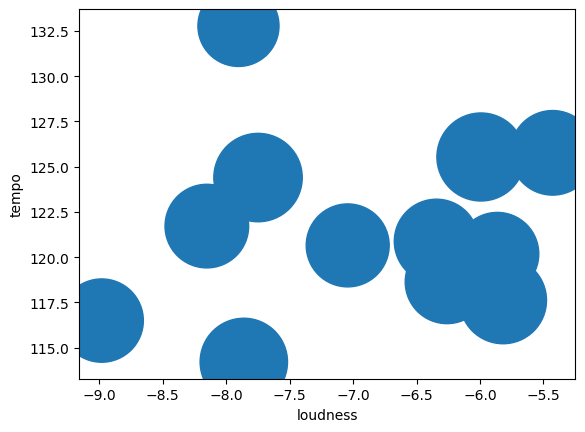

In [39]:
#comparison across genre 
genre_compare_df = big_df.groupby('main_genre')[['loudness', 'tempo', 'minutes']].mean()
genre_compare_df.plot.scatter( 'loudness', 'tempo', s = genre_compare_df['minutes'] * 1000)

In [25]:
#mode count by genre 
mode_counts = big_df.groupby('main_genre')['mode'].value_counts()
mode_counts
#unsure if this is correct 

main_genre        mode
Dance/Electronic  1.0       22
                  0.0       19
Other             1.0     1110
                  0.0      470
R&B               1.0     2840
                  0.0     2604
country           1.0       64
                  0.0        4
edm               1.0     3143
                  0.0     2900
hip hop           1.0      521
                  0.0      444
latin             1.0     2906
                  0.0     2264
pop               1.0     7440
                  0.0     4561
rap               1.0     2996
                  0.0     2750
rock              1.0     5425
                  0.0     2071
set()             1.0       13
                  0.0        9
soul              1.0      183
                  0.0       71
Name: mode, dtype: int64

In [27]:
#who are the most popular singers in the dataset
top_10_artists = big_df['artist'].value_counts().head(10)
top_10_artists

Queen               167
Martin Garrix       166
The Chainsmokers    135
David Guetta        134
Drake               128
Calvin Harris       120
Ed Sheeran          118
Maroon 5            111
Rihanna             107
Don Omar            102
Name: artist, dtype: int64